1. Importing necessary Libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

2. Loading the dataset

In [ ]:
df = pd.read_csv("credit_card_data_headers.csv", sep="\t")

In [3]:
print(df.head())

   A1     A2     A3    A8  A9  A10  A11  A12  A14  A15  R1
0   1  30.83  0.000  1.25   1    0    1    1  202    0   1
1   0  58.67  4.460  3.04   1    0    6    1   43  560   1
2   0  24.50  0.500  1.50   1    1    0    1  280  824   1
3   1  27.83  1.540  3.75   1    0    5    0  100    3   1
4   1  20.17  5.625  1.71   1    1    0    1  120    0   1


3. Exploratory data analysis (EDA)

In [4]:
print("Dataset shape:", df.shape)
print("Dataset info:", df.info())
print("Missing values in each column:\n", df.isnull().sum())
print("Statistical summary:\n", df.describe().T)
print("Unique values", {col: df[col].nunique() for col in df.columns})


Dataset shape: (654, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      654 non-null    int64  
 1   A2      654 non-null    float64
 2   A3      654 non-null    float64
 3   A8      654 non-null    float64
 4   A9      654 non-null    int64  
 5   A10     654 non-null    int64  
 6   A11     654 non-null    int64  
 7   A12     654 non-null    int64  
 8   A14     654 non-null    int64  
 9   A15     654 non-null    int64  
 10  R1      654 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 56.3 KB
Dataset info: None
Missing values in each column:
 A1     0
A2     0
A3     0
A8     0
A9     0
A10    0
A11    0
A12    0
A14    0
A15    0
R1     0
dtype: int64
Statistical summary:
      count         mean          std    min     25%      50%       75%  \
A1   654.0     0.689602     0.463010   0.00   0.000    1.000    1.0000   
A2   

4. Preprocessing of the dataset

In [ ]:
X = df.drop("R1", axis=1)
y = df["R1"]

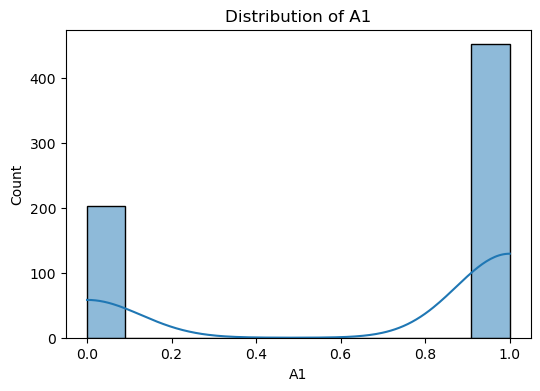

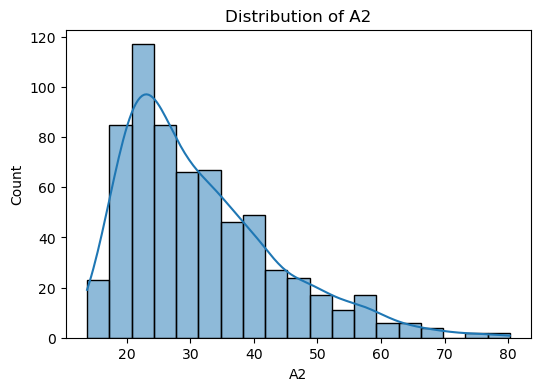

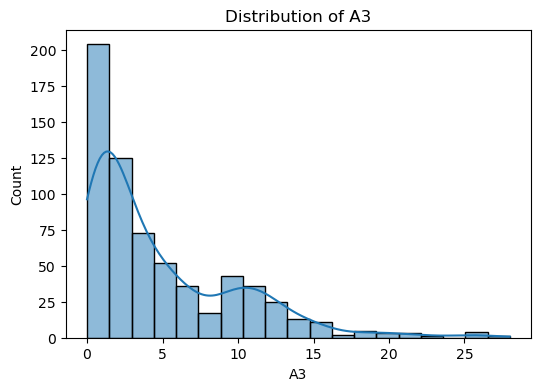

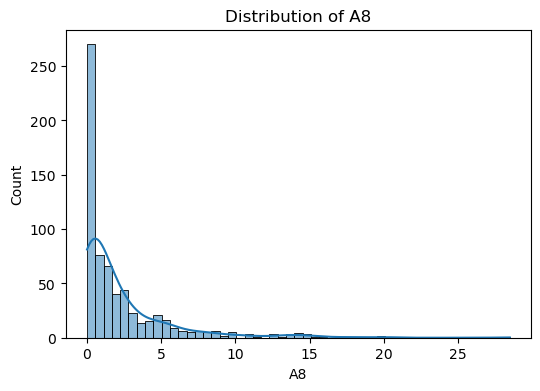

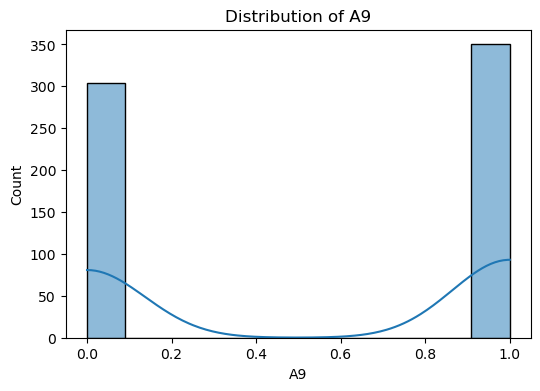

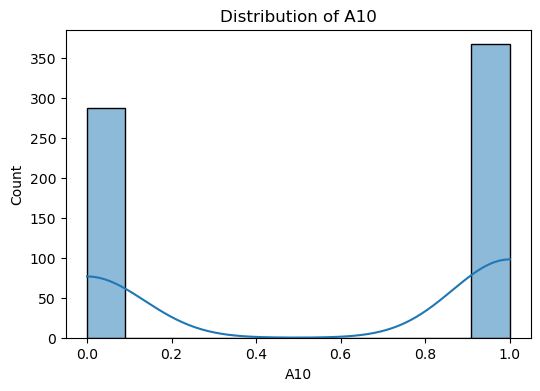

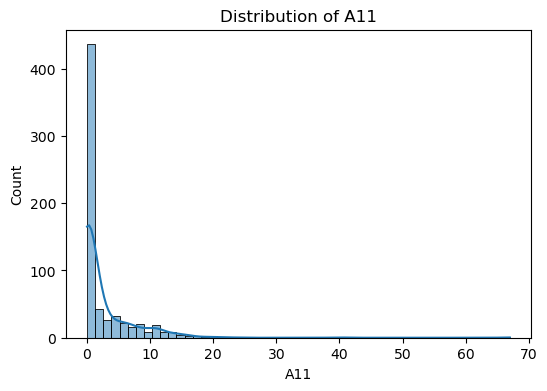

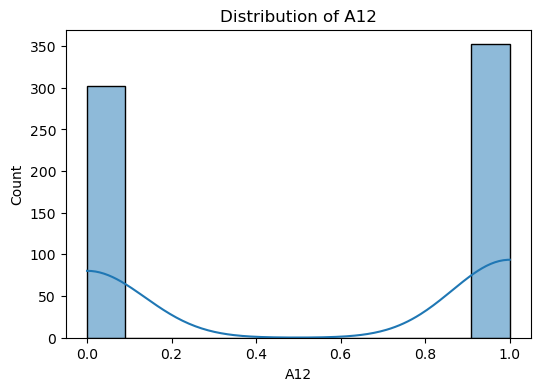

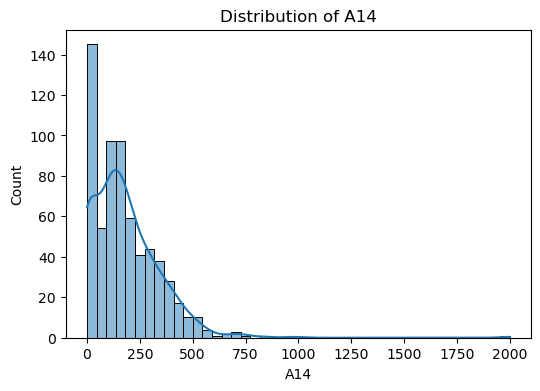

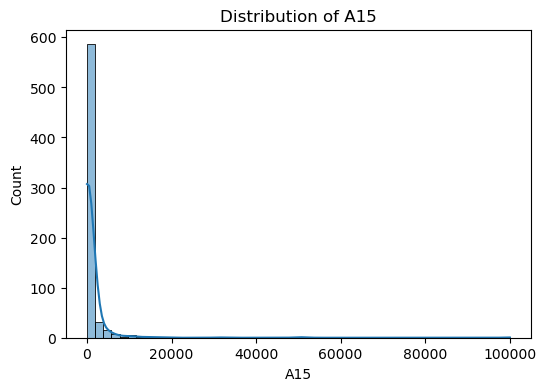

In [6]:
# distribution of X features
for col in X.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

5. Model training

5.1. Decision tree model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Model Accuracy:", metrics.accuracy_score(y_test, y_pred_dt))

Decision Tree Model Accuracy: 0.7786259541984732


5.2 KNN Model

In [8]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Model Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))

KNN Model Accuracy: 0.6870229007633588


6. Model evaluation

6.1 Confusion matrix for decision tree

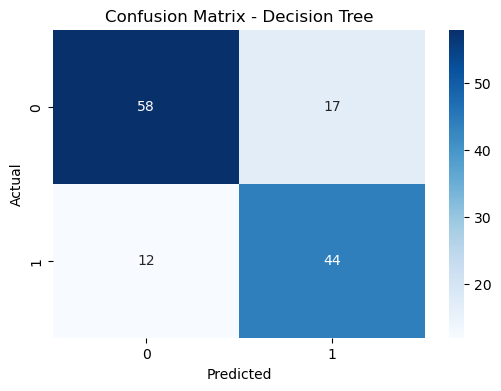

In [9]:
# confusion matrix for decision tree
conf_matrix_dt = metrics.confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

6.2 Confusion matrix KNN

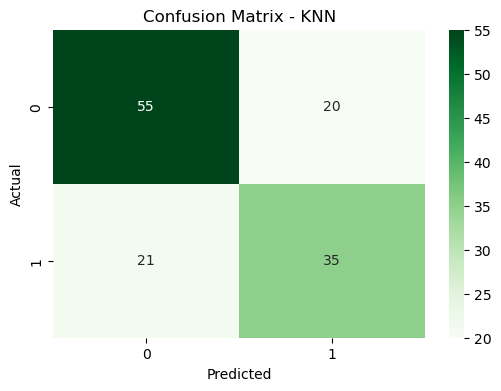

In [10]:
# confusion matrix for KNN
conf_matrix_knn = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

7. Model tuning and optimization

7.1 Model tunning and optimization for decision tree

In [11]:
# model tuning and optimization for decision tree
dt_model_optimized = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_model_optimized.fit(X_train, y_train)
y_pred_dt_optimized = dt_model_optimized.predict(X_test)
print("Optimized Decision Tree Model Accuracy:", metrics.accuracy_score(y_test, y_pred_dt_optimized))

Optimized Decision Tree Model Accuracy: 0.8244274809160306


7.2 Model tuning and optimization for KNN

In [12]:
# model tunning and optimization for KNN
knn_model_optimized = KNeighborsClassifier(n_neighbors=7)
knn_model_optimized.fit(X_train, y_train)
y_pred_knn_optimized = knn_model_optimized.predict(X_test)
print("Optimized KNN Model Accuracy:", metrics.accuracy_score(y_test, y_pred_knn_optimized))
# hyperparameter tuning and optimization for KNN using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters for KNN:", grid_search.best_params_)
best_knn_model = grid_search.best_estimator_
y_pred_best_knn = best_knn_model.predict(X_test)
print("Best KNN Model Accuracy after GridSearchCV:", metrics.accuracy_score(y_test, y_pred_best_knn))

Optimized KNN Model Accuracy: 0.6793893129770993
Best parameters for KNN: {'n_neighbors': np.int64(10)}
Best KNN Model Accuracy after GridSearchCV: 0.6946564885496184


8. Feature importance

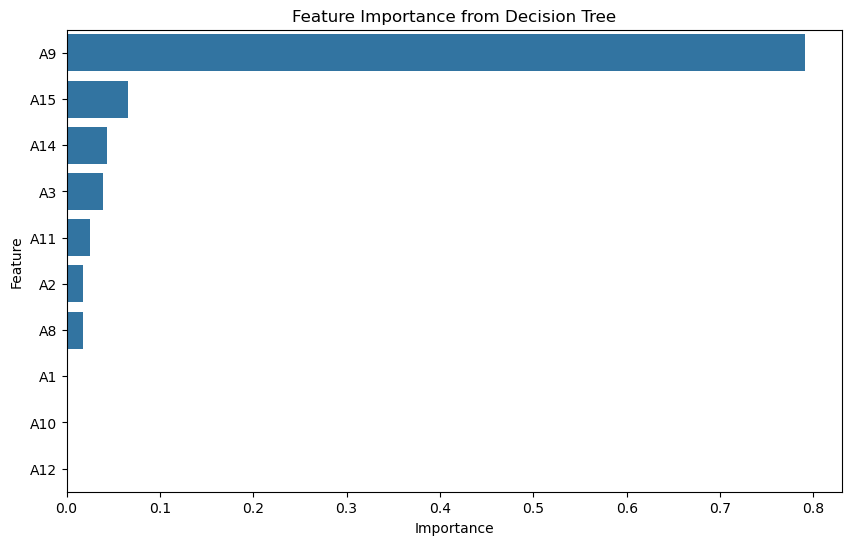

In [13]:
# feature importance
feature_importances = dt_model_optimized.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Decision Tree')
plt.show()